In [49]:
import numpy as np
import pickle
import os
#import download
import pandas as pd


########################################################################

# Directory where you want to download and save the data-set.
# Set this before you start calling any of the functions below.
data_path = "/Users/jj/Desktop/cifar/" #"C:\\WPI\\UnsupervisedLearning\\FinalProject\\cifar\\" 

# URL for the data-set on the internet.
data_url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"

########################################################################
# Various constants for the size of the images.
# Use these constants in your own program.

# Width and height of each image.
img_size = 32

# Number of channels in each image, 3 channels: Red, Green, Blue.
num_channels = 3

# Length of an image when flattened to a 1-dim array.
img_size_flat = img_size * img_size * num_channels

# Number of classes.
num_classes = 10

########################################################################
# Various constants used to allocate arrays of the correct size.

# Number of files for the training-set.
_num_files_train = 5

# Number of images for each batch-file in the training-set.
_images_per_file = 10000

# Total number of images in the training-set.
# This is used to pre-allocate arrays for efficiency.
_num_images_train = _num_files_train * _images_per_file

########################################################################
# Private functions for downloading, unpacking and loading data-files.


def _get_file_path(filename=""):
    """
    Return the full path of a data-file for the data-set.
    If filename=="" then return the directory of the files.
    """

    return os.path.join(data_path,  filename)


def _unpickle(filename):
    """
    Unpickle the given file and return the data.
    Note that the appropriate dir-name is prepended the filename.
    """

    # Create full path for the file.
    file_path = _get_file_path(filename)

    print("Loading data: " + file_path)

    with open(file_path, mode='rb') as file:
        # In Python 3.X it is important to set the encoding,
        # otherwise an exception is raised here.
        data = pickle.load(file, encoding='bytes')

    return data


def _convert_images(raw):
    """
    Convert images from the CIFAR-10 format and
    return a 4-dim array with shape: [image_number, height, width, channel]
    where the pixels are floats between 0.0 and 1.0.
    """

    # Convert the raw images from the data-files to floating-points.
    raw_float = np.array(raw, dtype=float) / 255.0

    # Reshape the array to 4-dimensions.
    images = raw_float.reshape([-1, num_channels, img_size, img_size])

    # Reorder the indices of the array.
    images = images.transpose([0, 2, 3, 1])

    return images


def _load_data(filename):
    """
    Load a pickled data-file from the CIFAR-10 data-set
    and return the converted images (see above) and the class-number
    for each image.
    """

    # Load the pickled data-file.
    data = _unpickle(filename)

    # Get the raw images.
    raw_images = data[b'data']

    # Get the class-numbers for each image. Convert to numpy-array.
    cls = np.array(data[b'labels'])

    # Convert the images.
    images = _convert_images(raw_images)

    return images, cls


########################################################################
# Public functions that you may call to download the data-set from
# the internet and load the data into memory.


def maybe_download_and_extract():
    """
    Download and extract the CIFAR-10 data-set if it doesn't already exist
    in data_path (set this variable first to the desired path).
    """

    download.maybe_download_and_extract(url=data_url, download_dir=data_path)


def load_class_names():
    """
    Load the names for the classes in the CIFAR-10 data-set.
    Returns a list with the names. Example: names[3] is the name
    associated with class-number 3.
    """

    # Load the class-names from the pickled file.
    raw = _unpickle(filename="batches.meta")[b'label_names']

    # Convert from binary strings.
    names = [x.decode('utf-8') for x in raw]

    return names


def load_training_data():
    """
    Load all the training-data for the CIFAR-10 data-set.
    The data-set is split into 5 data-files which are merged here.
    Returns the images, class-numbers and one-hot encoded class-labels.
    """

    # Pre-allocate the arrays for the images and class-numbers for efficiency.
    images = np.zeros(shape=[_num_images_train, img_size, img_size, num_channels], dtype=float)
    cls = np.zeros(shape=[_num_images_train], dtype=int)

    # Begin-index for the current batch.
    begin = 0

    # For each data-file.
    for i in range(_num_files_train):
        # Load the images and class-numbers from the data-file.
        images_batch, cls_batch = _load_data(filename="data_batch_" + str(i + 1))

        # Number of images in this batch.
        num_images = len(images_batch)

        # End-index for the current batch.
        end = begin + num_images

        # Store the images into the array.
        images[begin:end, :] = images_batch

        # Store the class-numbers into the array.
        cls[begin:end] = cls_batch

        # The begin-index for the next batch is the current end-index.
        begin = end

    return images, cls


def load_test_data():
    """
    Load all the test-data for the CIFAR-10 data-set.
    Returns the images, class-numbers and one-hot encoded class-labels.
    """

    images, cls = _load_data(filename="test_batch")

    return images, cls

########################################################################
    
images, cls=load_training_data()

print(images[1:5]) 

#########################################################################

    
    


Loading data: /Users/jj/Desktop/cifar/data_batch_1
Loading data: /Users/jj/Desktop/cifar/data_batch_2
Loading data: /Users/jj/Desktop/cifar/data_batch_3
Loading data: /Users/jj/Desktop/cifar/data_batch_4
Loading data: /Users/jj/Desktop/cifar/data_batch_5
[[[[ 0.60392157  0.69411765  0.73333333]
   [ 0.49411765  0.5372549   0.53333333]
   [ 0.41176471  0.40784314  0.37254902]
   ..., 
   [ 0.35686275  0.37254902  0.27843137]
   [ 0.34117647  0.35294118  0.27843137]
   [ 0.30980392  0.31764706  0.2745098 ]]

  [[ 0.54901961  0.62745098  0.6627451 ]
   [ 0.56862745  0.6         0.60392157]
   [ 0.49019608  0.49019608  0.4627451 ]
   ..., 
   [ 0.37647059  0.38823529  0.30588235]
   [ 0.30196078  0.31372549  0.24313725]
   [ 0.27843137  0.28627451  0.23921569]]

  [[ 0.54901961  0.60784314  0.64313725]
   [ 0.54509804  0.57254902  0.58431373]
   [ 0.45098039  0.45098039  0.43921569]
   ..., 
   [ 0.30980392  0.32156863  0.25098039]
   [ 0.26666667  0.2745098   0.21568627]
   [ 0.2627451   

In [50]:
images_1=images.ravel()

In [51]:
images_final = images_1.reshape(-1,4)

In [52]:
import numpy as np
from sklearn.decomposition import PCA


pca = PCA(n_components=4)
pca.fit(images_final)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [53]:
print(pca.explained_variance_ratio_) 

[ 0.88516142  0.05791753  0.04166907  0.01525198]


In [54]:
print(pca.singular_values_) 

[ 2933.34932476   750.33908718   636.44290463   385.04870275]


In [55]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [56]:
print(var1)

[  88.52   94.31   98.48  100.01]


In [57]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline


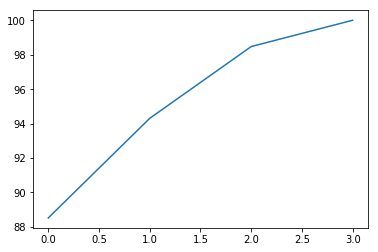

In [58]:
plt.plot(var1)